# Evaluate Model Performance Based on Metrics - Iris dataset

In [50]:
__author__ = "Will Hinton"
__email__ = "willhint@gmail.com"
__website__ = "whinton0.github.io/py"

### Import libraries and load dataset

In [51]:
## Import libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_absolute_error as MAE, mean_squared_error as MSE, mean_absolute_percentage_error as MAPE
from sklearn.metrics import classification_report as cr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import percentile

# Load the iris dataset
iris = pd.DataFrame(datasets.load_iris().data)
iris.columns = datasets.load_iris().feature_names
iris['type'] = datasets.load_iris().target
iris['type'] = iris['type'].astype('object')

### Create the new feature  
Create a new feature by multiplying sepal length by sepal width and dividing by petal length * petal width. 


In [52]:
iris['new'] = (iris.iloc[:, 0] * iris.iloc[:, 1]) / (iris.iloc[:, 2] * iris.iloc[:, 3])

### Split the data  
Split data into training and test sets (80% train, 20% test) stratified by 'type'.  

In [53]:
X_train, X_test, y_train, y_test = tts(iris.iloc[:, :-1], iris['type'], test_size=0.2, random_state=42, stratify=iris['type'])  

### Define evaluation function  

On the training set, evaluate the estimators for sepal width using ME, MPE, MAPE, MAE, and MSE.

In [54]:
# Define evaluation function
def myf(y, yhat):
    ME = np.round(np.mean(y - yhat), 3)
    MPE = np.round(np.mean((y - yhat) / y), 3)
    myMAE = np.round(MAE(y, yhat), 3)
    myMSE = np.round(MSE(y, yhat), 3)
    myMAPE = np.round(MAPE(y, yhat), 3)
    print("\n", "ME:", ME, "\n", "MPE:", MPE, "\n", "MAE:", myMAE, "\n", "MSE:", myMSE, "\n", "MAPE:", myMAPE) 

### Set Estimators for sepal width and evaluate each.  

Two estimators will be evaluated:  
 * Mean of petal length calculated only on the training data
 * Mean of sepal length minus petal width calculated only on the training data  
Print the results for each estimator

In [55]:
 # Estimators for sepal width

 est1 = np.mean(X_train['petal length (cm)'])
 est2 = np.mean(X_train['sepal length (cm)'] - X_train['petal width (cm)'])
 est1_vals = [est1] * len(y_test) 
 est2_vals = [est2] * len(y_test) 

 print("Estimator 1 Results:")
 myf(X_test['sepal width (cm)'], est1_vals)
 print("Estimator 2 Results:")
 myf(X_test['sepal width (cm)'], est2_vals)

Estimator 1 Results:

 ME: -0.677 
 MPE: -0.237 
 MAE: 0.694 
 MSE: 0.602 
 MAPE: 0.242
Estimator 2 Results:

 ME: -1.543 
 MPE: -0.522 
 MAE: 1.543 
 MSE: 2.526 
 MAPE: 0.522


### Classifier using quantiles 

On the test set, evaluate the two classifiers (built on the training set) below for ‘type’ using  
accuracy, precision, recall, and the F1 score.  
* Up to 1st quantile of sepal length = type 0, >1st up to 2d quantile = type 1, >2d quantile = type 2
* Up to 2d quantile of sepal length = type 0, >2d up to 3d quantile = type 1, >3d quantile = type 2 


In [56]:
# First classifier (based on 1st and 2nd quantiles)
est3 = percentile(X_train['sepal length (cm)'], [25, 50])
y_hat = np.zeros(len(y_test))
y_hat[X_test['sepal length (cm)'] > est3[0]] = 1
y_hat[X_test['sepal length (cm)'] > est3[1]] = 2
y_hat = y_hat.astype('int')
print("Classifier 1 Report:")
print(cr(y_test.astype('int'), y_hat))

Classifier 1 Report:
              precision    recall  f1-score   support

           0       0.71      0.50      0.59        10
           1       0.33      0.20      0.25        10
           2       0.59      1.00      0.74        10

    accuracy                           0.57        30
   macro avg       0.55      0.57      0.53        30
weighted avg       0.55      0.57      0.53        30



In [57]:
# Second classifier (based on 2nd and 3rd quantiles)
est4 = percentile(X_train['sepal length (cm)'], [50, 75])
y_hat2 = np.zeros(len(y_test))
y_hat2[X_test['sepal length (cm)'] > est4[0]] = 1
y_hat2[X_test['sepal length (cm)'] > est4[1]] = 2
y_hat2 = y_hat2.astype('int')
print("Classifier 2 Report:")
print(cr(y_test.astype('int'), y_hat2))

Classifier 2 Report:
              precision    recall  f1-score   support

           0       0.69      0.90      0.78        10
           1       0.38      0.30      0.33        10
           2       0.67      0.60      0.63        10

    accuracy                           0.60        30
   macro avg       0.58      0.60      0.58        30
weighted avg       0.58      0.60      0.58        30



### Visualizations
Show a pair plot of the iris. Plot a comparison of the estimators as a frequency of sepal width.  
The show a comparison of classifier predictions as the frequency of the predicted class.

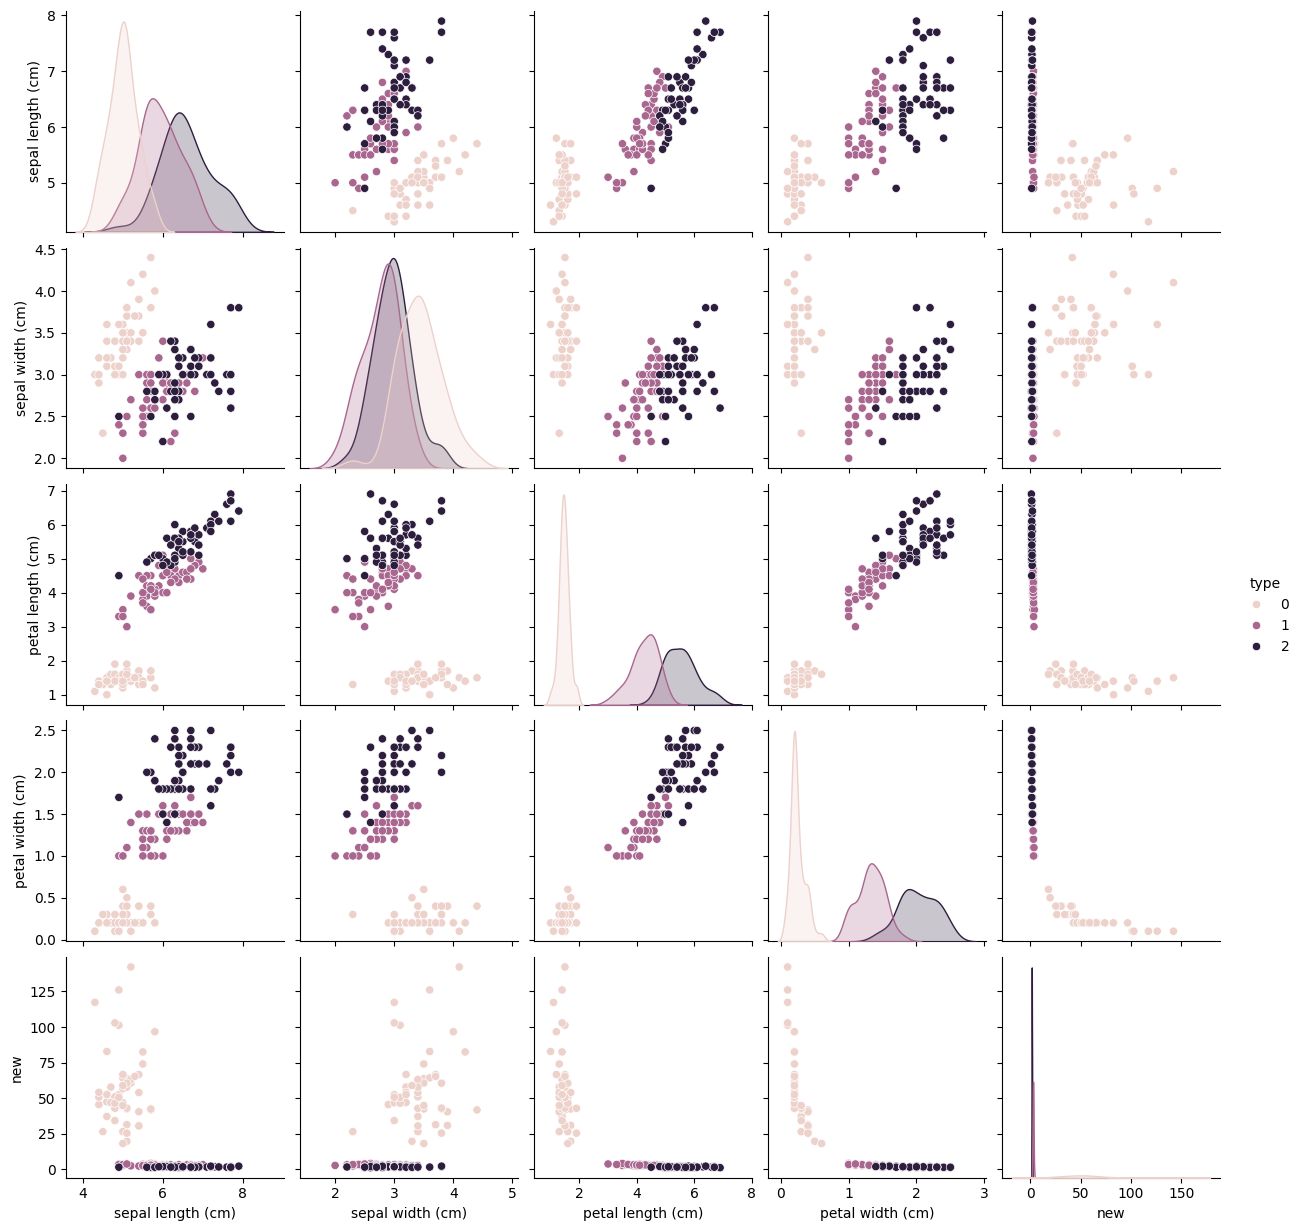

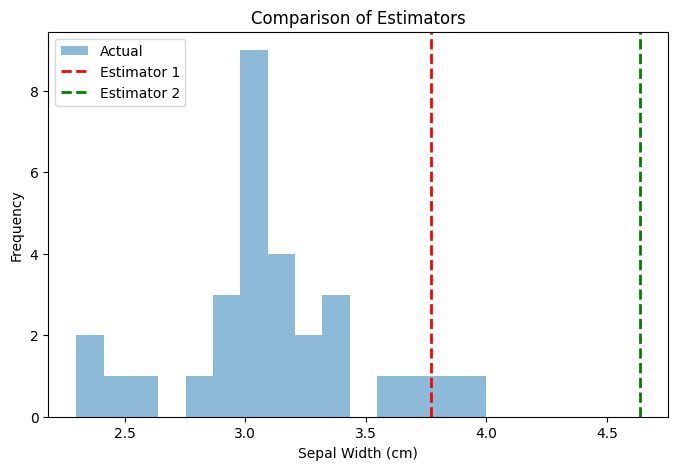

In [58]:
# Visualizations
sns.pairplot(iris, hue='type')
plt.show()

# Plot estimators comparison
plt.figure(figsize=(8,5))
plt.hist(X_test['sepal width (cm)'], bins=15, alpha=0.5, label='Actual')
plt.axvline(est1, color='r', linestyle='dashed', linewidth=2, label='Estimator 1')
plt.axvline(est2, color='g', linestyle='dashed', linewidth=2, label='Estimator 2')
plt.legend()
plt.title('Comparison of Estimators')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')
plt.show()

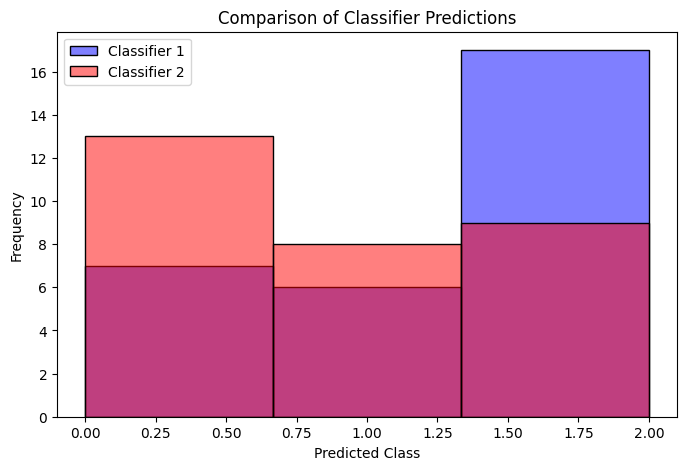

In [59]:
# Plot comparative classifier results
plt.figure(figsize=(8,5))
sns.histplot(y_hat, bins=3, alpha=0.5, color='blue', label='Classifier 1')
sns.histplot(y_hat2, bins=3, alpha=0.5, color='red', label='Classifier 2')
plt.legend()
plt.title('Comparison of Classifier Predictions')
plt.xlabel('Predicted Class')
plt.ylabel('Frequency')
plt.show()

### Improve with a Decision Tree Classifier  
Consider what can be improved by trying a decision tree classifier.  
Print the decision tree accuracy and classification report.
Plot a comparison of the classifier predictions.


In [60]:
# Improve with a Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Ensure the target variable is an integer type
iris['type'] = iris['type'].astype(int)

# Split data again after type conversion
X_train, X_test, y_train, y_test = tts(iris.iloc[:, :-1], iris['type'], test_size=0.2, random_state=42, stratify=iris['type'])

# Initialize and train the classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred = dt_classifier.predict(X_test)

# Print Decision Tree Accuracy
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))

# Print Classification Report
print("\nDecision Tree Classifier Report:")
print(classification_report(y_test, y_pred)) 


Decision Tree Accuracy: 1.0

Decision Tree Classifier Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



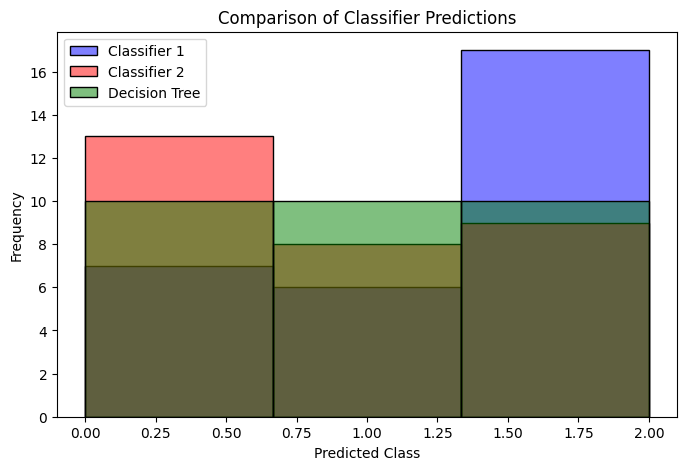

In [61]:
# Plot Comparative Classifier Results
plt.figure(figsize=(8, 5))
sns.histplot(y_hat, bins=3, alpha=0.5, color='blue', label='Classifier 1')
sns.histplot(y_hat2, bins=3, alpha=0.5, color='red', label='Classifier 2')
sns.histplot(y_pred, bins=3, alpha=0.5, color='green', label='Decision Tree')
plt.legend()
plt.title('Comparison of Classifier Predictions')
plt.xlabel('Predicted Class')
plt.ylabel('Frequency')
plt.show()